In [3]:
from data.create_data import *
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf

%matplotlib inline

In [4]:
data = read_frmgham()
clean_data = data.dropna(subset=['cigpday', 'sysbp'])
cigpday = clean_data.cigpday
sysbp = clean_data.sysbp

#### Research Questions
  1. What is the relationship between the number of cigarettes smoked per day (`cigpday`) and systolic blood pressure (`sysbp`)?
    * **Correlation** quantifies the strength and direction of the relationship between the 2 variables.
  2. What is the functional relationship between `cigpday` and `sysbp`? Is there a linear relationship?
    * **Linear Regression**

# Exploratory Analyses: Scatter Plots

Scatter plots provide a general impression of the relationship between cigarettes smoked per day (`cigpday`) and systolic blood pressure (`sysbp`).

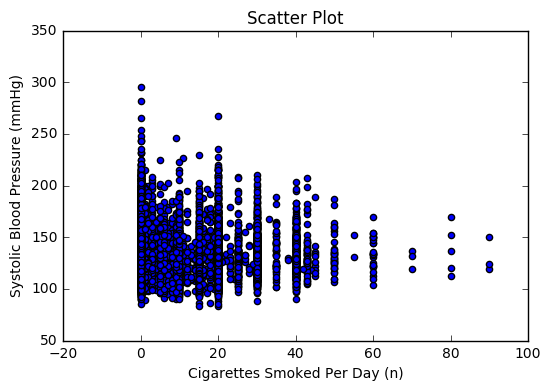

In [5]:
plt.scatter(cigpday, sysbp)
plt.xlabel('Cigarettes Smoked Per Day (n)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('Scatter Plot')
plt.show()

##### Conclusion 
The figure indicates that there is no apparent relationship between the 2 variables. 

**Drawbacks**: It should be noted that scatter plots are not the best representation of data since data are packed/binned into columns, losing specificity. As result, some information is lost in the translation.

## Jittering
Jittering is used for *visualization purposes only*. It minimizes the effect of losing information that's inherit with a scatter plot by adding random noise. The addition reverses the effect of rounding off. Thus, reducing the visual effect and makes relationship clearer.

**Drawbacks**: Jittering the scatterplot results in the loss of information when multiple data points overlap (plotted on top of each other).  This overlap hides data in the dense parts of the figure and gives disproportionate emphasis to outliers (saturation).

**Solution**: The `alpha` parameter is crucial to mitigate this drawback and extract information relevant to the overlapping data points.

In [6]:
def Jitter(values, jitter=0.5):
    """Jitters the values by adding a uniform variate in (-jitter, jitter).

    values: sequence
    jitter: scalar magnitude of jitter
    
    returns: new numpy array
    """
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values

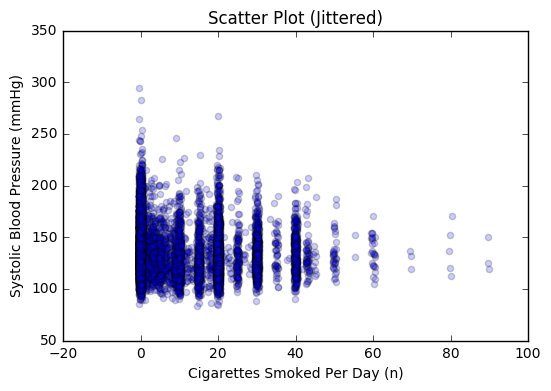

In [7]:
plt.scatter(Jitter(cigpday), Jitter(sysbp), alpha = 0.2)
plt.xlabel('Cigarettes Smoked Per Day (n)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('Scatter Plot (Jittered)')
plt.show()

##### Conclusion 
The figure indicates that there is no apparent relationship between the 2 variables. 

# Correlation
Correlation coefficients are used to quantify the strength of the relationship between `cigpday` and `sysbp`.

## Covariance
Covariance is the measure of the tendency of `cigpday` and `sysbp` to vary together.

In [8]:
np.cov(cigpday, sysbp)[0,1]

-28.514203970645841

##### Conclusion
The covariance of `cigpday` and `sysbp` has a value of -28.52 cigarettes-mmHg. The negative value indicates that the tendency between the 2 variables point in opposite directions.

## Pearson's Correlation

In [9]:
pear_coef = stats.pearsonr(cigpday, sysbp)[0]
pear_coef

-0.10277147127875084

The Pearson's Correlation Coefficient for the 2 variables is -0.103. Thus, indicating a weak negative linear correlation between the number of cigarettes smoked per day and systolic blood pressure.

**Note**: A flaw of the Pearson's correlation is that it's not robust in the presence of outliers.

## Spearman's Correlation

In [10]:
spear_coef = clean_data[['cigpday', 'sysbp']].corr(method='spearman')
spear_coef.loc['cigpday', 'sysbp']

-0.13455160990517298

The Spearman's Correlation Coefficient is also weak (-0.135), which suggests that there is no rank-order correlation between `cigpday` and `sysbp`.

It should also be noted that neither feature's data type is ordinal (order) and this Spearman's correlation may not be appropriate.

# Linear Regression
Identify if there's a linear relationship between `cigpday` and `sysbp`. If so, is the apparent slope due to chance?

#### Variables:
  * Explanatory/Independent Variable (Feature): **`cigpday`**
  * Dependent Variable (Response): **`sysbp`**  

### Approach
#### Model: Simple Linear Regression
Create a linear model to predict the quantitative response of `sysbp` using the predictor/feature `cigpday`.
**`y = β`<sub>0</sub> + `β`<sub>1</sub>`x`<sub>1</sub>**

#### Method: Ordinary Least Squares (Linear Least Squares Fit)
Identify a linear regression model that minimizes the sum of squares of the residuals. In otherwords, find the least squares fit.

## Hypothesis Test

### 1. Hypothesis
  * **H<sub>0</sub>**: There is no linear relationship between the number of cigarettes smoked per day and systolic blood pressure (
  =0).
  * **H<sub>A</sub>**: There is a linear relationship between the number of cigarettes smoked per day and systolic blood pressure (β<sub>1</sub> ≠ 0).
  
### 2. Statistical Test
Compute the test statistic & p-value

In [11]:
formula = 'sysbp~cigpday'
model = smf.ols(formula, data=clean_data)
results = model.fit()
inter = results.params['Intercept']
slope = results.params['cigpday']
print "intercept = %.3f" % inter
print "slope = %.3f" % slope

intercept = 137.900
slope = -0.192


#### Model Coefficients
  * β<sub>0</sub> (intercept) = 137.9
  * β<sub>1</sub> (slope) = -0.192

The test-statistic (slope) is -0.192. From the linear regression the model, the equation to predict `sysbp` using the predictor variable `cigpday` is:  
`y = -0.192x + 137.9`

#### p-value

In [12]:
pval = results.pvalues['cigpday']
pval

1.712993908356409e-28

#### 95% Confidence Interval

In [13]:
list(results.conf_int().loc['cigpday'])

[-0.22588675532723687, -0.15809058472952928]

The confidence interval represents the confidence in the model. 95% of the confidence intervals from a series of resampling would contain the "true" model coefficients (slope and intercept) within the range of -0.226 and -0.158.

#### Results Statistics

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sysbp   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     123.3
Date:                Thu, 23 Mar 2017   Prob (F-statistic):           1.71e-28
Time:                        14:38:18   Log-Likelihood:                -52415.
No. Observations:               11548   AIC:                         1.048e+05
Df Residuals:                   11546   BIC:                         1.048e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    137.8998      0.254    541.848      0.000       137.401   138.399
cigpday       -0.1920      0.017    -11.102      0.000        -0.226    -0.158
==============================================================================
Omnibus:                     1539.315   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2496.304
Skew:                           0.921   Prob(JB):                         0.00
Kurtosis:                       4.339   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Analyze the Results.
#### Decide to Accept or Reject the null H<sub>0</sub>
Since the p-value < 0.05 and the confidence interval does not include 0, we reject the null hypothesis in favor of the alternative.

#### Conclusion
Based on our sample, there is a statistically significant association between the number of cigarettes smoked per dat and an individual's systolic blood pressure.

For every one unit increase in the number of cigarettes smoked per day, the mean systolic blood pressure decreased by -0.192 units.

## Plot

In [15]:
def FitLine(xs, inter, slope):
    """Fits a line to the given data.

    xs: sequence of x

    returns: tuple of numpy arrays (sorted xs, fit ys)
    """
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

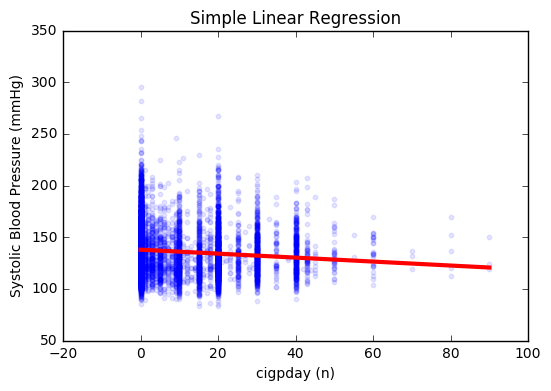

In [23]:
fit_xs, fit_ys = FitLine(cigpday, inter, slope) # fitted line (estimation of slope)

plt.scatter(cigpday, sysbp, color='b', alpha=0.1, s=10)
# plt.plot(fit_xs, fit_ys, color='r', linewidth=3) # expected
plt.plot(cigpday, results.fittedvalues, color='r', linewidth=3) # expected
plt.xlabel("cigpday (n)")
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.title('Simple Linear Regression')
plt.show()

## Goodness of Fit
Determine how well does the model fit the data.

### RMSE 
The root mean squared error is the standard deviation of the residuals. It is best used to quantify the strength of relationship between `cigpday` and `sysbp`.

It measures the absolute fit of the model to the data (how close to the observed data points are to the model's predicted values).

In [17]:
rmse = results.resid.std()
print "RMSE of sysbp (residual) = %.3f mmHg" % rmse

RMSE of sysbp (residual) = 22.646 mmHg


In [18]:
rmse2 = clean_data['sysbp'].std()
print "RMSE of sysbp (y) = %.3f mmHg" % rmse2

RMSE of sysbp (y) = 22.766 mmHg


In [19]:
print "[%3f, %3f]" % (sysbp.min(), sysbp.max())

[83.500000, 295.000000]


##### Conclusion
The RMSE of the model is approximately 22.65 mmHg. The RMSE is relatively small in comparison to the range of the dependent variable. Thus, the lower the RMSE value, the better the indication of a good fit.

Comparing the standard deviation of residuals and systolic blood pressure (`ys`), it appears that knowing the number of cigerattes smoked per day (*explanatory variable*) does notimprove the model's predictions substantially.

### Coefficient of Determination (R<sup>2</sup>)
The coefficient of determination quantifies the goodness of fit of the linear model to the data. More specifically, it demosntrates the quality of the model's prediction.

The range of the value is [0, 1].

In [20]:
results.rsquared

0.01056197530879921

##### Conclusion
The R<sup>2</sup> value is 0.011, which indicates that the number of cigarettes smoked per day predicts about 1.1% of variance in systolic blood pressure. 

The small coefficient of determination value suggests that the proposed linear regression model does not improve prediction 